In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_57817/2487694293.py:2: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [2]:
df.drop(columns= ['id', 'Unnamed: 21', 'Unnamed: 22'], inplace= True)

In [3]:
"""import ydata_profiling as yp
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title ="CD")
profile.to_file("Customer_Info.html")

from IPython.display import FileLink
FileLink("Customer_Info.html")"""

'import ydata_profiling as yp\nfrom ydata_profiling import ProfileReport\n\nprofile = ProfileReport(df, title ="CD")\nprofile.to_file("Customer_Info.html")\n\nfrom IPython.display import FileLink\nFileLink("Customer_Info.html")'

Handle Missing Values

In [4]:
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar', nan, 'MANAGEMENT', 'STUDENT',
       'ENTREPRENEUR', 'HOUSEMAID', 'RETIRED', 'UNEMPLOYED', 'TECHNICIAN',
       'ADMIN.', 'BLUE-COLLAR', 'SELF-EMPLOYED'], dtype=object)

In [5]:
df['job'].fillna('Unknown', inplace=True)

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_57817/660431346.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna('Unknown', inplace=True)


In [6]:
def transform_text(text):
    text = text.lower()
    return text

df['job'] = df['job'].apply(transform_text)
df['job'].unique()

array(['admin.', 'housemaid', 'unknown', 'entrepreneur', 'technician',
       'self-employed', 'student', 'unemployed', 'services', 'management',
       'retired', 'blue-collar'], dtype=object)

In [7]:
df['job'].value_counts(normalize = True) * 100

job
management       8.738575
blue-collar      8.624664
unemployed       8.491769
admin.           8.483632
technician       8.410404
unknown          8.318190
housemaid        8.280220
services         8.201568
self-employed    8.185295
retired          8.179870
student          8.060535
entrepreneur     8.025277
Name: proportion, dtype: float64

Text(0.5, 1.0, 'job')

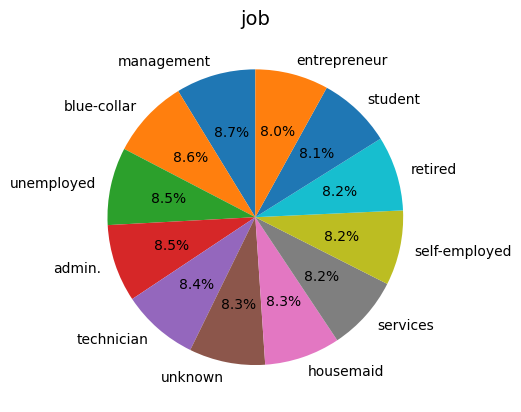

In [8]:
import matplotlib.pyplot as plt

category_counts = df['job'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=14)


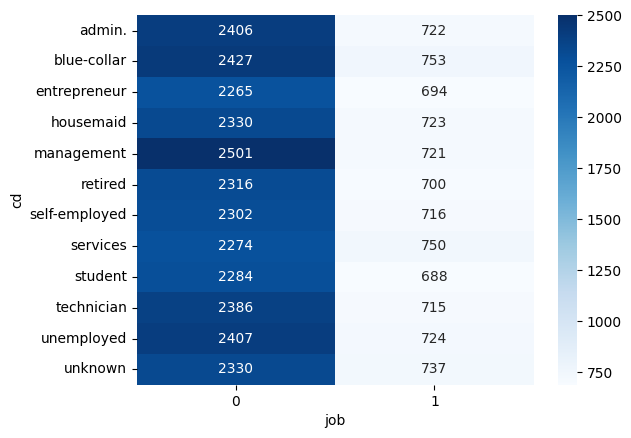

In [9]:
import seaborn as sns
crosstab = pd.crosstab(df['job'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('job')
plt.ylabel('cd')
plt.show()


marital Column

In [10]:
#Missing value is 1.2% -> lets impute mode
mode_val = df['marital'].mode()[0]
df['marital'].fillna(mode_val, inplace = True)

/var/folders/tf/nb2206b133550_hpm_b_xr_40000gn/T/ipykernel_57817/1855353689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital'].fillna(mode_val, inplace = True)


In [11]:
df['marital'].value_counts(normalize = True) * 100

marital
married     49.003282
single      29.066204
divorced    21.930514
Name: proportion, dtype: float64

In [12]:
pd.crosstab(df['marital'], df['cd'])

cd,0,1
marital,,
divorced,6153,1933
married,13853,4215
single,8222,2495


Text(0.5, 1.0, 'job')

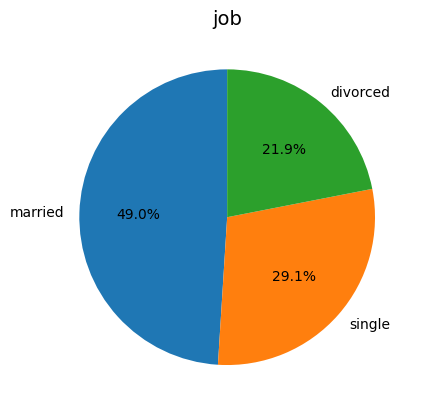

In [13]:
category_counts = df['marital'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('job', fontsize=14)

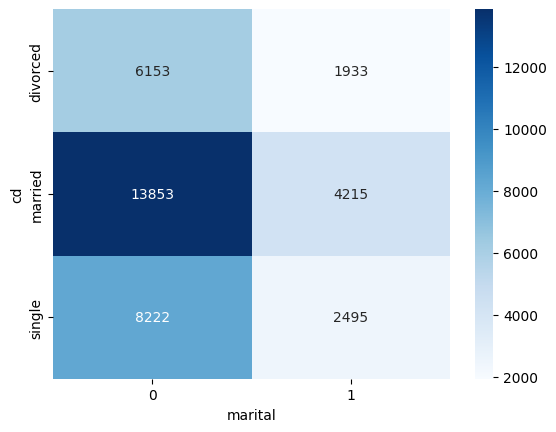

In [14]:
crosstab = pd.crosstab(df['marital'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('marital')
plt.ylabel('cd')
plt.show()


MAried -> single -> divorced

In [15]:
oe = {'married': 1, 'single': 2, 'divorced': 3}
df['marital'] = df['marital'].map(oe)

In [16]:
df['marital']

0        2
1        3
2        1
3        1
4        2
        ..
36866    1
36867    3
36868    3
36869    1
36870    2
Name: marital, Length: 36871, dtype: int64

poutcome

In [17]:
df['poutcome'].unique()

array(['failure', 'unknown', 'other', 'success'], dtype=object)

In [19]:
df['poutcome'] = df['poutcome'].replace({
    'other': 'Unknown', 
    'unknown': 'Unknown'
})

In [20]:
df['poutcome'].value_counts(normalize = True) * 100

poutcome
Unknown    51.389981
failure    24.726750
success    23.883269
Name: proportion, dtype: float64

In [21]:
pd.crosstab(df['poutcome'], df['cd'])

cd,0,1
poutcome,,
Unknown,14578,4370
failure,6996,2121
success,6654,2152


Text(0.5, 1.0, 'poutcome')

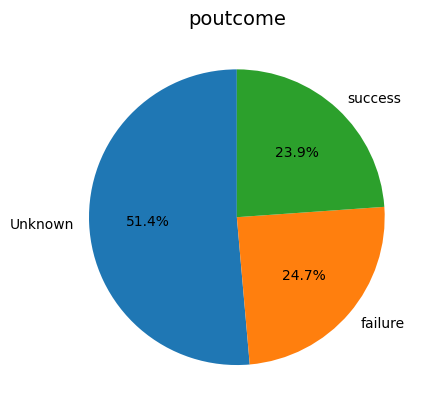

In [22]:
category_counts = df['poutcome'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('poutcome', fontsize=14)

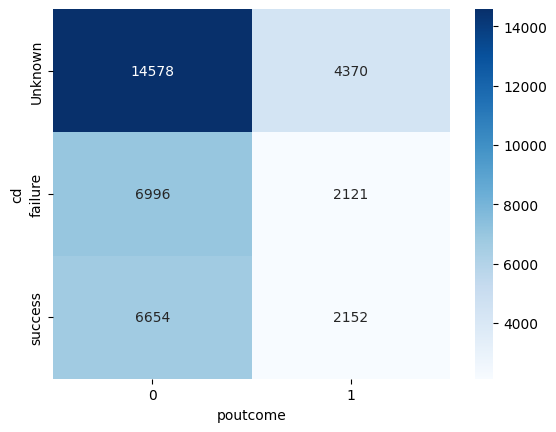

In [23]:
crosstab = pd.crosstab(df['poutcome'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('poutcome')
plt.ylabel('cd')
plt.show()

In [24]:
oe = {'Unknown': 1, 'failure': 2, 'success': 3}
df['poutcome'] = df['poutcome'].map(oe)

Contact

In [26]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [27]:
pd.crosstab(df['contact'], df['cd'])

cd,0,1
contact,,
cellular,10052,3032
telephone,8680,2954
unknown,9496,2657


In [28]:
df['contact'].value_counts(normalize = True) * 100

contact
cellular     35.485883
unknown      32.960864
telephone    31.553253
Name: proportion, dtype: float64

Text(0.5, 1.0, 'contact')

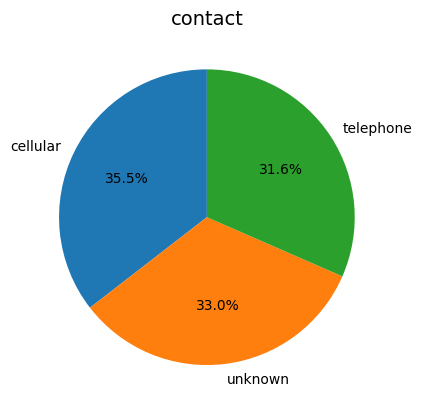

In [29]:
category_counts = df['contact'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('contact', fontsize=14)

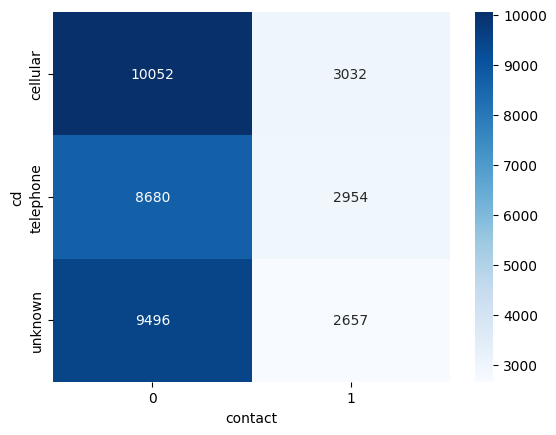

In [30]:
crosstab = pd.crosstab(df['contact'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('contact')
plt.ylabel('cd')
plt.show()

Applying OHE on job, marital, poutcome, and contact

In [31]:
from sklearn.preprocessing import OneHotEncoder

cols_to_ohe = ['job', 'contact']

ohe = OneHotEncoder(sparse_output=False)

for col in cols_to_ohe:
    encoded_col = ohe.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=ohe.get_feature_names_out([col])).astype(int)
    df = pd.concat([df, encoded_df], axis=1).drop([col], axis=1)

generation

In [32]:
df['generation'].unique()

array(['Millennials', 'Silent Generation', 'Older Boomers', 'Gen X',
       'Younger Boomers', nan, 'millennials', 'gen x',
       'silent generation', 'older boomers', 'Millenials', 'oler boomers'],
      dtype=object)

In [33]:
df['generation'] = df['generation'].replace({
    'Silent Generation' : 'Silent',
    'silent generation': 'Silent',
    'oler boomers': 'Older',
    'Older Boomers': 'Older',
    'older boomers': 'Older',
    'Younger Boomers': 'Younger',
    'Gen X': 'Gen X',
    'gen x': 'Gen X',
    'millennials': 'Millenials',
    'Millennials': 'Millenials',
    'Millenials':'Millenials'
})

In [34]:
df['generation'].unique()

array(['Millenials', 'Silent', 'Older', 'Gen X', 'Younger', nan],
      dtype=object)

In [35]:
df['generation'].isnull().sum()/len(df['generation'])

0.00743131458327683

In [36]:
df['generation']= df['generation'].fillna(df['generation'].mode()[0])

In [37]:
pd.crosstab(df['generation'], df['cd'])

cd,0,1
generation,,
Gen X,4574,1384
Millenials,6423,1968
Older,3409,1020
Silent,10199,3184
Younger,3623,1087


Text(0.5, 1.0, 'generation')

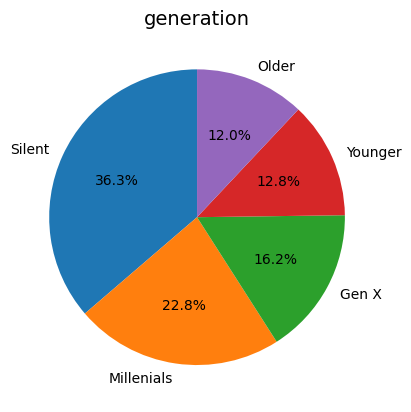

In [38]:
category_counts = df['generation'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('generation', fontsize=14)

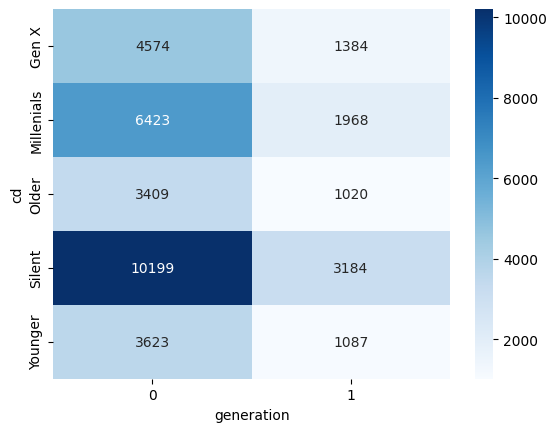

In [39]:
crosstab = pd.crosstab(df['generation'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('generation')
plt.ylabel('cd')
plt.show()

In [40]:
oe = {'Silent': 1, 'Millenials': 2, 'Gen X': 3, 'Younger': 4, 'Older':5}
df['generation'] = df['generation'].map(oe)

education column

In [42]:
df['education'].unique()

array(['tertiary', 'primary', 'unknown', 'secondary', 'primery',
       'secendary'], dtype=object)

In [43]:
df['education'] = df['education'].replace({
    'tertiary': 'Tertiary',
    'primary': 'Primary',
    'primery': 'Primary',    
    'secondary': 'Secondary',
    'secendary': 'Secondary', 
    'unknown': 'Unknown'
})

In [44]:
df['education'].unique()

array(['Tertiary', 'Primary', 'Unknown', 'Secondary'], dtype=object)

In [45]:
df['education'].value_counts(normalize = True) * 100

education
Secondary    46.678962
Tertiary     29.155705
Primary      15.451168
Unknown       8.714166
Name: proportion, dtype: float64

In [46]:
pd.crosstab(df['education'], df['cd'])

cd,0,1
education,,
Primary,4358,1339
Secondary,13118,4093
Tertiary,8317,2433
Unknown,2435,778


Text(0.5, 1.0, 'education')

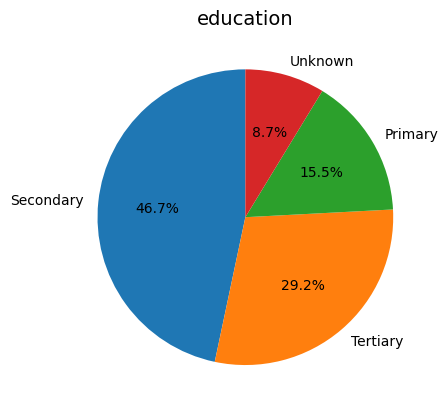

In [47]:
category_counts = df['education'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('education', fontsize=14)

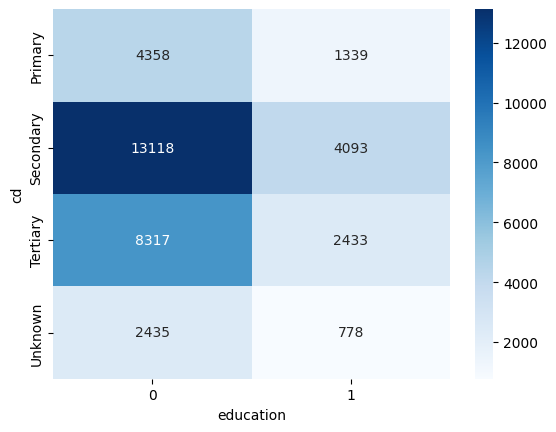

In [48]:
crosstab = pd.crosstab(df['education'], df['cd'])

sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d", cbar=True)

plt.xlabel('education')
plt.ylabel('cd')
plt.show()

In [49]:
oe = {'Secondary': 1, 'Tertiary': 2, 'Primary': 3, 'Younger': 4, 'Unknown':5}
df['education'] = df['education'].map(oe)

In [50]:
df['education']

0        2
1        3
2        5
3        2
4        3
        ..
36866    1
36867    1
36868    2
36869    1
36870    1
Name: education, Length: 36871, dtype: int64

In [ ]:
hgugkuhkjoi

default -> credit deafult

In [ ]:
df = df.rename(columns = {
    'default': 'credit_default'})

credit_default

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_to_map = ['credit_default', 'housing', 'loan']
le = LabelEncoder()

for col in cols_to_map:
    # Convert to String and Clean the Data
    df[col] = df[col].astype(str).str.strip().str.title()
    df[col] = le.fit_transform(df[col])

Day & Month Column

In [ ]:
df['month'].unique()

array(['jan', 'jun', 'may', 'oct', 'feb', 'dec', 'apr', 'nov', 'aug',
       'jul', 'mar', 'sep'], dtype=object)

In [ ]:
df['month'] = df['month'].astype(str).str.strip().str.lower()

month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df['month_num'] = df['month'].str.lower().map(month_mapping)
df['month_num'] = df['month_num'].astype(int)


# Create a temporary DataFrame with the combination of year, month, and day
temp_df = df[['month_num', 'day']].rename(columns={'month_num': 'month'}).assign(year=2022)
invalid_dates = temp_df[pd.to_datetime(temp_df, errors='coerce').isna()]
df = df[~pd.to_datetime(temp_df, errors='coerce').isna()]

df['day_of_year'] = pd.to_datetime(df[['month_num', 'day']].rename(columns={'month_num': 'month'}).assign(year=2022)).dt.dayofyear

In [ ]:
#df['day_of_year']

Balance, Duration, total_contact

campaign: int number of contacts performed during this campaign for this client

previous: int number of contacts performed before this campaign for this client

Skewness -> Outlier detection & treatment -> Transformation depneding on skewness -> Normalization

In [ ]:
# Count missing values (NaNs)
num_missing = df['campaign'].isnull().sum()
print(f'Number of missing values: {num_missing}')

# Count zero values
num_zeros = (df['campaign'] == 0).sum()
print(f'Number of zero values: {num_zeros}')

Number of missing values: 9
Number of zero values: 0


In [ ]:
# Count missing values (NaNs)
num_missing = df['previous'].isnull().sum()
print(f'Number of missing values: {num_missing}')

# Count zero values
num_zeros = (df['previous'] == 0).sum()
print(f'Number of zero values: {num_zeros}')

Number of missing values: 373
Number of zero values: 1623


In [ ]:
df['previous'] = df['previous'].fillna(0)
df['campaign'] = df['campaign'].fillna(0)

In [ ]:
df['previous'].astype(int)

0         8
1         4
2         4
3         6
4        24
         ..
36866    24
36867    58
36868    17
36869     5
36870    29
Name: previous, Length: 36547, dtype: int64

In [ ]:
df['previous'].astype(int)

0         8
1         4
2         4
3         6
4        24
         ..
36866    24
36867    58
36868    17
36869     5
36870    29
Name: previous, Length: 36547, dtype: int64

In [ ]:
df.columns

Index(['age', 'marital', 'education', 'credit_default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'cd', 'generation', 'state', 'zipcode', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'month_num',
       'day_of_year'],
      dtype='object')

In [ ]:
cols_to_skew = ['age', 'marital', 'education','balance', 'duration', 'campaign', 'pdays', 'previous','generation','day_of_year']

for col in cols_to_skew:
    skewness = df[col].skew()
    print('Skew of', col, ':', skewness)

Skew of age : 0.036626346991678355
Skew of marital : -0.09808411785925557
Skew of education : -0.43760783907709233
Skew of balance : 0.6146588956189863
Skew of duration : 0.19412534459346115
Skew of campaign : 0.5669266507363787
Skew of pdays : 0.6536950431584113
Skew of previous : 4.963420072786784
Skew of generation : 0.20030716468648282
Skew of day_of_year : 0.05770678753037287


In [ ]:
from scipy.stats import zscore

#Since col is skewed lets apply IQR
cols_for_OD = ['balance','pdays', 'campaign', 'previous']

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the number of outliers
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    total_values = len(df[col])
    outlier_percentage = (num_outliers / total_values) * 100
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

for col in cols_for_OD:
    detect_outliers_iqr(df, col)

#Since duration is normally distrubuted

cols_to_OD1 = ['marital','duration', 'age', 'day_of_year', 'education', 'generation']

def  detect_outlier_zcore(df, col, threshold=3):
    z_scores = zscore(df[col])

    # Calculate the number of outliers
    num_outliers = ((z_scores > threshold) | (z_scores < -threshold)).sum()
    total_values = len(df[col])
    outlier_percentage = (num_outliers / total_values) * 100
    print(f"Percentage of outliers in {col}: {outlier_percentage:.2f}%")

for col in cols_to_OD1:
    detect_outlier_zcore(df, col)


Percentage of outliers in balance: 0.00%
Percentage of outliers in pdays: 0.36%
Percentage of outliers in campaign: 0.00%
Percentage of outliers in previous: 2.53%
Percentage of outliers in marital: 0.00%
Percentage of outliers in duration: 0.00%
Percentage of outliers in age: 0.00%
Percentage of outliers in day_of_year: 0.00%
Percentage of outliers in education: 0.00%
Percentage of outliers in generation: 0.00%


Since outlier is 2.82%, applying winsorization

In [ ]:
# Capping at the 1st and 99th percentiles
lower_limit = df['previous'].quantile(0.01)
upper_limit = df['previous'].quantile(0.99)
df['previous'] = df['previous'].clip(lower_limit, upper_limit)

Skewness for total_contact is 3.9, applying log transformation

In [ ]:
import numpy as np
df['previous'] = 1 / (df['previous'] + 0.0001)  

In [ ]:
cols_to_z = ['age', 'marital', 'education','balance', 'duration', 'campaign', 'pdays', 'previous','generation','day_of_year']

for col in cols_to_z:
    print(df[col].eq(0).sum())

0
0
0
1
12
9
0
0
0
0


In [ ]:
#Applying Yeo-Johnson Transformation
from scipy import stats

from sklearn.preprocessing import PowerTransformer

df[['balance', 'duration', 'campaign']] = df[['balance','duration', 'campaign']] + 0.0001

pt = PowerTransformer(method='yeo-johnson')
cols_to_transform = ['age', 'marital', 'education','balance', 'duration', 'campaign', 'pdays', 'previous','generation','day_of_year']

for col in cols_to_transform:
    df[f'{col}_transformed'] = pt.fit_transform(df[[col]])



Text(0.5, 1.0, 'state')

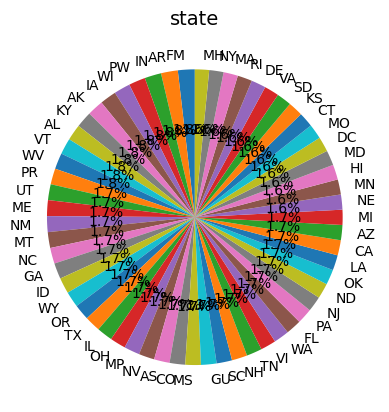

In [ ]:
category_counts = df['state'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('state', fontsize=14)

In [ ]:
df[df['state'].isnull()]
df['state'].isnull().sum()

0

In [ ]:
cols_to_ohe = ['state']

ohe = OneHotEncoder(sparse_output=False)

for col in cols_to_ohe:
    encoded_col = ohe.fit_transform(df[[col]])
    encoded_df = pd.DataFrame(encoded_col, columns=ohe.get_feature_names_out([col])).astype(int)
    df = pd.concat([df, encoded_df], axis=1).drop([col], axis=1)

Dropping unused cols

zipcode has 23837 distcinct values my dataset has 36,000 values model can read it

In [ ]:
df.columns

Index(['age', 'marital', 'education', 'credit_default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VI', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=106)

In [ ]:
df.drop(columns = ['age', 'marital', 'education','balance','day_of_year','duration'
        , 'campaign', 'pdays', 'previous','zipcode', 'generation', 'month_num', 'month', 'day'],inplace = True)

In [ ]:
df.columns

Index(['credit_default', 'housing', 'loan', 'cd', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_transformed', 'marital_transformed',
       'education_transformed', 'balance_transformed', 'duration_transformed',
       'campaign_transformed', 'pdays_transformed', 'previous_transformed',
       'generation_transformed', 'day_of_year_transformed', 'state_AK',
       'state_AL', 'state_AR', 'state_AS', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_FM', 'state_GA',
       'state_GU', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'st

In [ ]:
df.shape

(36867, 92)

In [ ]:
# Replace common placeholders with NaN
df.replace({"None": None, "N/A": None, "null": None}, inplace=True)

# Now check again for missing values
nan_columns = df.isnull().sum()
nan_columns_with_nan = nan_columns[nan_columns > 0]
print(nan_columns_with_nan)



credit_default    320
housing           320
loan              320
cd                320
job_admin.        320
                 ... 
state_VT          320
state_WA          320
state_WI          320
state_WV          320
state_WY          320
Length: 92, dtype: int64


In [ ]:
df.dropna(inplace=True)


In [ ]:
"""import ydata_profiling as yp
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title ="CD")
profile.to_file("Customer_Info_02.html")

from IPython.display import FileLink
FileLink("Customer_Info_02.html")"""

'import ydata_profiling as yp\nfrom ydata_profiling import ProfileReport\n\nprofile = ProfileReport(df, title ="CD")\nprofile.to_file("Customer_Info_02.html")\n\nfrom IPython.display import FileLink\nFileLink("Customer_Info_02.html")'

In [ ]:
X = df.drop('cd', axis =1)
y= df['cd']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cols_to_normalize = ['age_transformed', 'marital_transformed', 'education_transformed',
       'balance_transformed', 'duration_transformed', 'campaign_transformed',
       'pdays_transformed', 'previous_transformed', 'generation_transformed',
       'day_of_year_transformed']


scaler = StandardScaler()

X_train[cols_to_normalize] = scaler.fit_transform(X_train[cols_to_normalize])
X_test[cols_to_normalize] = scaler.transform(X_test[cols_to_normalize])

In [ ]:
X_train

,credit_default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,state_TN,state_TX,state_UT,state_VA,state_VI,state_VT,state_WA,state_WI,state_WV,state_WY
35398,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17459,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20508,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16988,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['credit_default', 'housing', 'loan', 'cd', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_transformed', 'marital_transformed',
       'education_transformed', 'balance_transformed', 'duration_transformed',
       'campaign_transformed', 'pdays_transformed', 'previous_transformed',
       'generation_transformed', 'day_of_year_transformed', 'state_AK',
       'state_AL', 'state_AR', 'state_AS', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_FM', 'state_GA',
       'state_GU', 'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN',
       'state_KS', 'state_KY', 'state_LA', 'state_MA', 'st

In [ ]:
aws

NameError: name 'aws' is not defined

[0.12395527 0.23279736 0.3161816  0.38996321 0.46250906 0.53482355
 0.59589391 0.654092   0.69140518 0.72733385 0.75228218 0.77559461
 0.79497899 0.81307958 0.83109186 0.84847776 0.85743227 0.86376665
 0.86998871 0.87616811 0.88233494 0.88842563 0.89444187 0.90043106
 0.90638321 0.91225773 0.91805085 0.92374261 0.92880226 0.93013845
 0.93146468 0.9327835  0.93409644 0.93540291 0.93670506 0.93800513
 0.93930186 0.94059326 0.94188059 0.94315867 0.94443107 0.94570209
 0.94697112 0.94823736 0.94950113 0.95076227 0.95201968 0.95327582
 0.95452913 0.95578001 0.95702916 0.95827547 0.95951919 0.96076235
 0.96200296 0.9632418  0.964479   0.96571601 0.96695112 0.9681852
 0.96941588 0.970639   0.97185774 0.97307531 0.97428915 0.97549958
 0.97670626 0.97791149 0.97911163 0.98030905 0.9814994  0.98268592
 0.98386948 0.98504914 0.98622657 0.98740021 0.98857143 0.98974068
 0.99090855 0.99207318 0.99323605 0.99438503 0.99552625 0.99666366
 0.99779664 0.99892832 1.         1.         1.         1.
 1. 

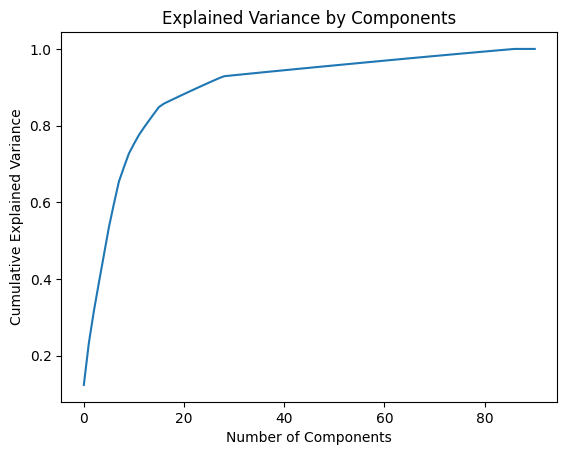

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components= None)
X_train = pca.fit_transform(X_train)

print(np.cumsum(pca.explained_variance_ratio_))

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

/Users/adityakumar/Classification_Project/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

params_xgb ={'n_estimators': 100,
            'max_depth': 10}

models = {

    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(**params_xgb),
    "Random Forest": RandomForestClassifier()
}

roc_auc_list = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_list.append({"Model": model_name, "ROC AUC": roc_auc})

pd.DataFrame(roc_auc_list)

,Model,ROC AUC
0,Gradient Boosting,0.470709
1,XGBoost,0.479952
2,Random Forest,0.473248


In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tqdm

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
y_pred_prob = model.predict(X_test).ravel()

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc}")

Epoch 1/50


/Users/adityakumar/Classification_Project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - AUC: 0.5481 - loss: 0.5710 - val_AUC: 0.6222 - val_loss: 0.5313
Epoch 2/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - AUC: 0.6071 - loss: 0.5347 - val_AUC: 0.6470 - val_loss: 0.5244
Epoch 3/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - AUC: 0.6298 - loss: 0.5269 - val_AUC: 0.6672 - val_loss: 0.5155
Epoch 4/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - AUC: 0.6640 - loss: 0.5159 - val_AUC: 0.6828 - val_loss: 0.5085
Epoch 5/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - AUC: 0.6745 - loss: 0.5076 - val_AUC: 0.6909 - val_loss: 0.5044
Epoch 6/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - AUC: 0.6828 - loss: 0.5053 - val_AUC: 0.7010 - val_loss: 0.4998
Epoch 7/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - AUC: 0.7005 - loss: 0.4994 - val_AUC: 0.7025 - val_loss: 0.4979
Epoch 8/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - AUC: 0.7011 - loss: 0.4955 - val_AUC: 0.7080 - val_loss: 0.4947
Epoch 9/50
725/725 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/st